In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

## Dataset Preprocessing

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

#### Loading the dataset

In [ ]:
dataset_path = '/content/drive/MyDrive/CSE422_project/Different_stores_dataset.csv'

In [ ]:
df = pd.read_csv(dataset_path)
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon


#### Moving the target column to last

In [ ]:
df = df[[c for c in df if c not in ['selling_price_per_unit']] + ['selling_price_per_unit']]
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,cost_price_per_unit,payment_method,region,state,shopping_mall,selling_price_per_unit
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1425.380,Credit Card,South,Kentucky,Kanyon,1500.40
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1620.459,Debit Card,South,Kentucky,Viaport Outlet,1800.51
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,295.060,Cash,West,California,Metrocity,300.08
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,2900.765,Credit Card,South,Florida,Metropol AVM,3000.85
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,45.450,Cash,South,Florida,Kanyon,60.60


#### Dropping the irrelevant columns

In [ ]:
df = df.drop(['invoice_no', 'invoice_date', 'customer_id'], axis=1)
df.head()

,gender,age,category,quantity,cost_price_per_unit,payment_method,region,state,shopping_mall,selling_price_per_unit
0,Female,28,Clothing,5,1425.380,Credit Card,South,Kentucky,Kanyon,1500.40
1,Male,21,Shoes,3,1620.459,Debit Card,South,Kentucky,Viaport Outlet,1800.51
2,Male,20,Clothing,1,295.060,Cash,West,California,Metrocity,300.08
3,Female,66,Shoes,5,2900.765,Credit Card,South,Florida,Metropol AVM,3000.85
4,Female,53,Books,4,45.450,Cash,South,Florida,Kanyon,60.60


#### Handling null values

In [ ]:
null_values = df.isnull().sum()
print(null_values)

gender                    0
age                       0
category                  0
quantity                  0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
selling_price_per_unit    0
dtype: int64


#### Encoding categorial variables

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['gender', 'category', 'payment_method', 'region', 'state',
       'shopping_mall'],
      dtype='object')

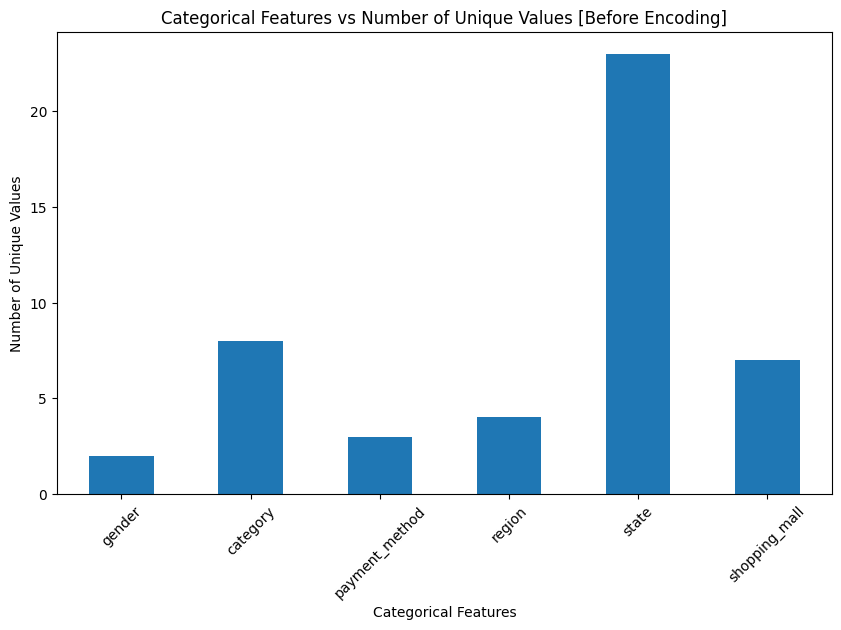

In [ ]:
unique_counts = df[categorical_cols].nunique()
plt.figure(figsize=(10, 6))
unique_counts.plot(kind='bar')
plt.title('Categorical Features vs Number of Unique Values [Before Encoding]')
plt.ylabel('Number of Unique Values')
plt.xlabel('Categorical Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,gender,age,category,quantity,cost_price_per_unit,payment_method,region,state,shopping_mall,selling_price_per_unit
0,0,28,1,5,1425.380,1,2,11,1,1500.40
1,1,21,4,3,1620.459,2,2,11,5,1800.51
2,1,20,1,1,295.060,0,3,2,3,300.08
3,0,66,4,5,2900.765,1,2,5,4,3000.85
4,0,53,0,4,45.450,0,2,5,1,60.60


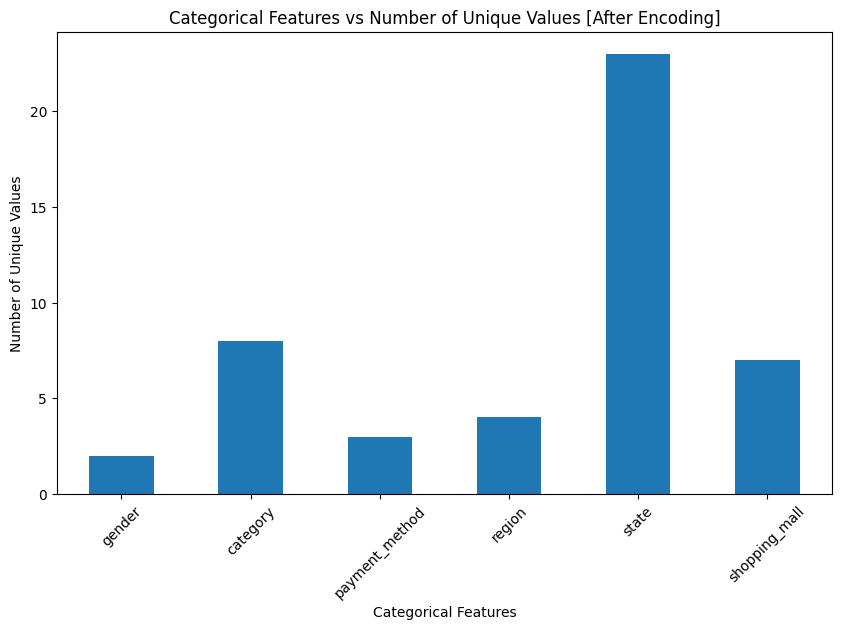

In [ ]:
unique_counts = df[categorical_cols].nunique()
plt.figure(figsize=(10, 6))
unique_counts.plot(kind='bar')
plt.title('Categorical Features vs Number of Unique Values [After Encoding]')
plt.ylabel('Number of Unique Values')
plt.xlabel('Categorical Features')
plt.xticks(rotation=45)
plt.show()

#### Feature Scaling

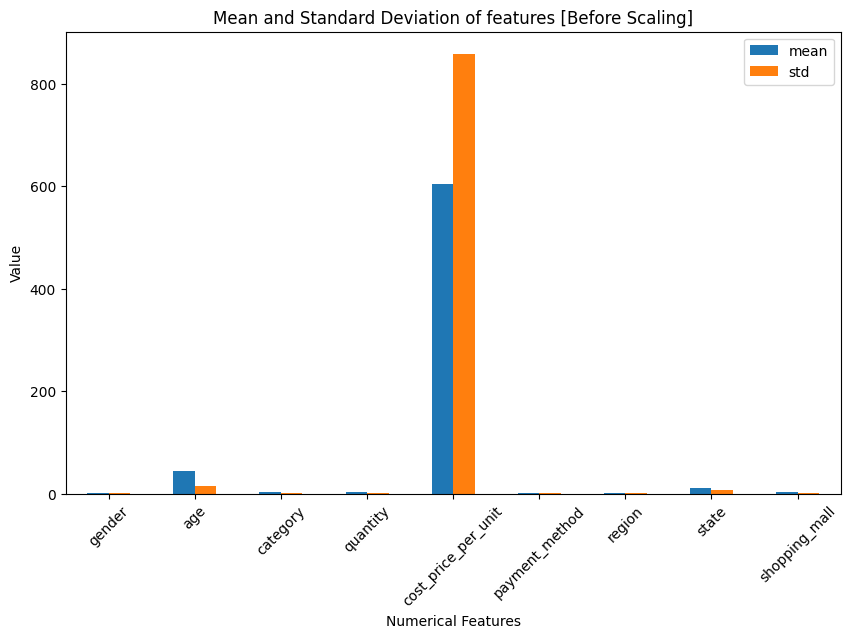

In [ ]:
numerical_features = df.drop(['selling_price_per_unit'], axis=1).select_dtypes(include=['int64', 'float64']).columns
numerical_stats = df[numerical_features].agg(['mean', 'std'])
numerical_stats.transpose().plot(kind='bar', figsize=(10, 6))
plt.title('Mean and Standard Deviation of features [Before Scaling]')
plt.ylabel('Value')
plt.xlabel('Numerical Features')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('selling_price_per_unit', axis=1))

final_df = pd.DataFrame(scaled_features, columns=list(df.columns[:-1]))
final_df['selling_price_per_unit'] = df['selling_price_per_unit']

final_df.head()

,gender,age,category,quantity,cost_price_per_unit,payment_method,region,state,shopping_mall,selling_price_per_unit
0,-0.819788,-1.029160,-0.848867,1.410072,0.955093,0.319314,0.369201,0.026292,-0.832737,1500.40
1,1.219828,-1.496139,0.596219,-0.003126,1.182237,1.622581,0.369201,0.026292,1.280825,1800.51
2,1.219828,-1.562850,-0.848867,-1.416324,-0.361017,-0.983953,1.229931,-1.236487,0.224044,300.08
3,-0.819788,1.505867,0.596219,1.410072,2.672986,0.319314,0.369201,-0.815560,0.752434,3000.85
4,-0.819788,0.638621,-1.330562,0.703473,-0.651655,-0.983953,0.369201,-0.815560,-0.832737,60.60


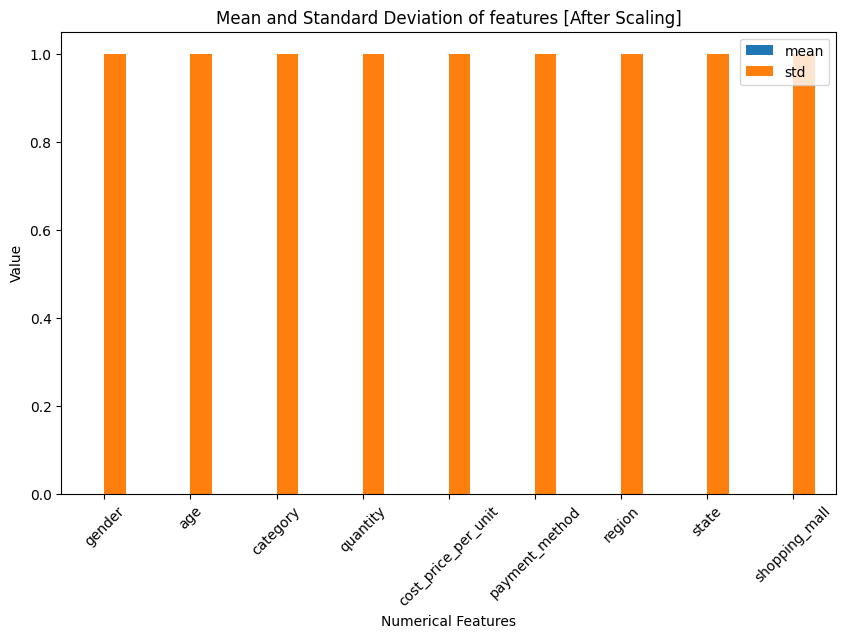

In [ ]:
numerical_features = final_df.drop(['selling_price_per_unit'], axis=1).select_dtypes(include=['int64', 'float64']).columns
numerical_stats = final_df[numerical_features].agg(['mean', 'std'])
numerical_stats.transpose().plot(kind='bar', figsize=(10, 6))
plt.title('Mean and Standard Deviation of features [After Scaling]')
plt.ylabel('Value')
plt.xlabel('Numerical Features')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

#### Visualizations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

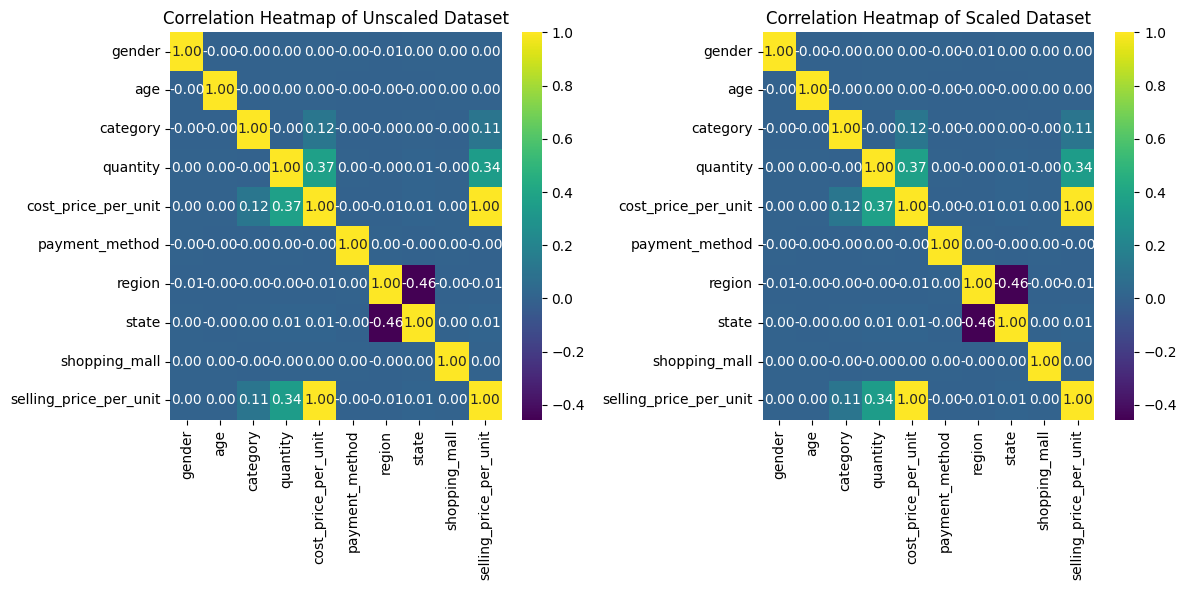

In [ ]:
plt.figure(figsize=(12, 6))

# Encoded (Unscaled) Dataset Visualization
plt.subplot(1, 2, 1)
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap of Unscaled Dataset')

# Encoded (Scaled) Dataset Visualization
plt.subplot(1, 2, 2)
sns.heatmap(final_df.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap of Scaled Dataset')

plt.tight_layout()
plt.show()

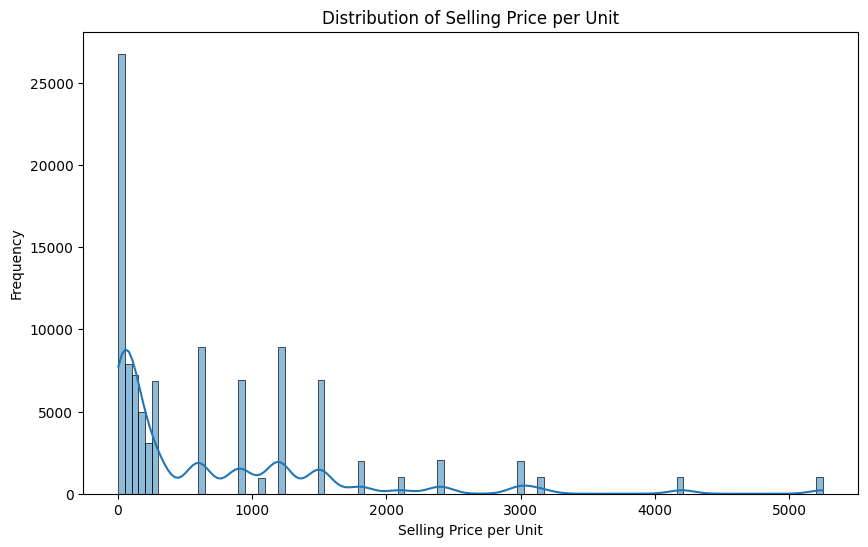

In [ ]:
# Plotting the distribution of selling_price_per_unit
plt.figure(figsize=(10, 6))
sns.histplot(final_df['selling_price_per_unit'], kde=True)
plt.title('Distribution of Selling Price per Unit')
plt.xlabel('Selling Price per Unit')
plt.ylabel('Frequency')
plt.show()

## Dataset splitting

In [ ]:
X = final_df.drop('selling_price_per_unit', axis=1)
y = final_df['selling_price_per_unit']

# 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


(((69619, 9), (69619,)), ((29838, 9), (29838,)))

## Model trainings

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

#### Support Vector Machine (SVM) [Takes too long to run, so avoided it]

In [ ]:
# svm_model = SVR()
# svm_model.fit(X_train, y_train)

[LibSVM]

In [ ]:
# svm_predictions = svm_model.predict(X_test)

In [ ]:
# svm_mse = mean_squared_error(y_test, svm_predictions)
# svm_r2 = r2_score(y_test, svm_predictions)

# print("MSE of SVM:", svm_mse)
# print("R2 score of SVM:", svm_r2)

#### Linear Regression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_predictions = linear_model.predict(X_test)

In [ ]:
l_mse = mean_squared_error(y_test, linear_predictions)
l_r2 = r2_score(y_test, linear_predictions)

print("MSE of Linear Regression:", l_mse)
print("R2 score of Linear Regression:", l_r2)

MSE of Linear Regression: 3246.8542221489297
R2 score of Linear Regression: 0.9963510488561645


#### Descision Tree

In [ ]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dectree_predictions = decision_tree_model.predict(X_test)

In [ ]:
dt_mse = mean_squared_error(y_test, dectree_predictions)
dt_r2 = r2_score(y_test, dectree_predictions)

print("MSE of Decision Tree:", dt_mse)
print("R2 score of Decision Tree:", dt_r2)

MSE of Decision Tree: 0.05540705141095243
R2 score of Decision Tree: 0.9999999377312285


#### Neural Network

In [ ]:
neural_network_model = MLPRegressor(max_iter=500)
neural_network_model.fit(X_train, y_train)

MLPRegressor(max_iter=500)

In [ ]:
nn_predictions = neural_network_model.predict(X_test)

In [ ]:
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print("MSE of Neural Network:", nn_mse)
print("R2 score of neural Network:", nn_r2)

MSE of Neural Network: 4.041713429164957
R2 score of neural Network: 0.9999954577526949


## Comparison Analysis of the models used

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
models = ['Linear Regression', 'Decision Tree', 'Neural Network']
predictions = [linear_predictions, dectree_predictions, nn_predictions]
mse_scores = []
r2_scores = []

for preds in predictions:
    mse_scores.append(mean_squared_error(y_test, preds))
    r2_scores.append(r2_score(y_test, preds))

evaluation_results = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R2 Score': r2_scores
})

evaluation_results

,Model,MSE,R2 Score
0,Linear Regression,3246.854222,0.996351
1,Decision Tree,0.055407,1.000000
2,Neural Network,4.041713,0.999995


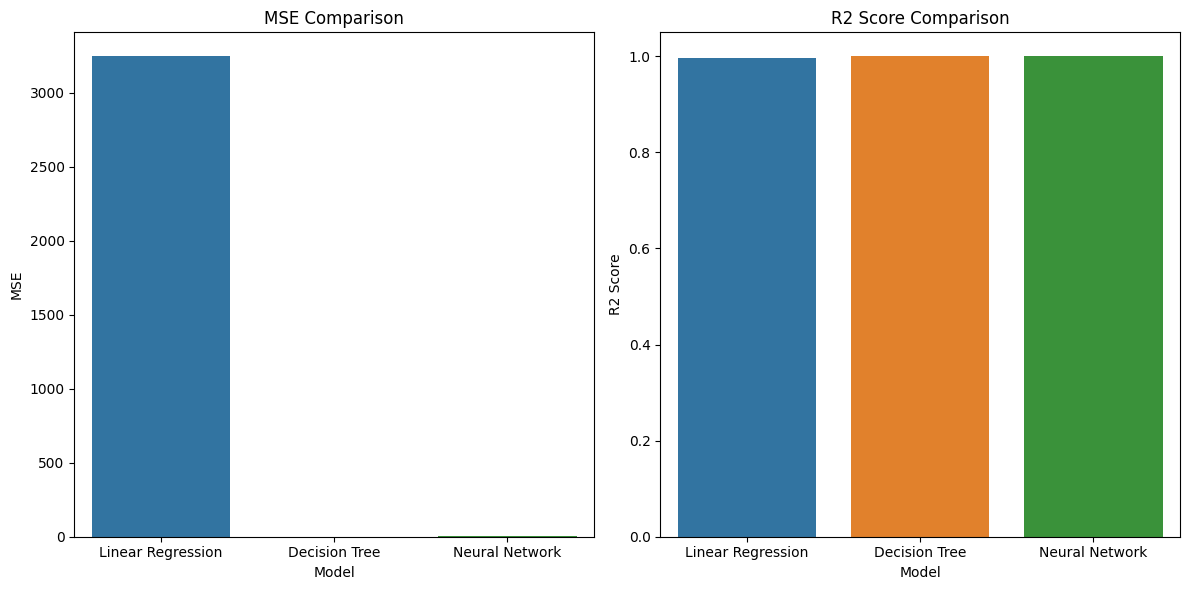

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=evaluation_results)
plt.title('MSE Comparison')
plt.ylabel('MSE')
plt.xlabel('Model')

# Plotting R2 Score
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2 Score', data=evaluation_results)
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.xlabel('Model')

plt.tight_layout()
plt.show()

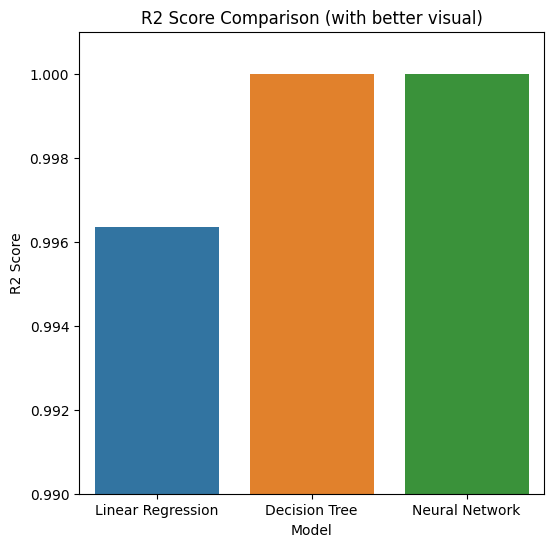

In [ ]:
# As R2 looks similar, scaling Y axis for better visualization
plt.figure(figsize=(6, 6))
sns.barplot(x='Model', y='R2 Score', data=evaluation_results)
plt.title('R2 Score Comparison (with better visual)')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.ylim(0.99, 1.001)
plt.show()

## Trying the best two models, with Cost_per_unit_price removed

Because there is a very high corelation between cost_price_per_unit and selling_price_per_unit

### Training and evaluating

In [ ]:
X_new = final_df.drop(['selling_price_per_unit', 'cost_price_per_unit'], axis=1)
y_new = final_df['selling_price_per_unit']

# 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=123)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((69619, 8), (69619,)), ((29838, 8), (29838,)))

#### Decision Tree

In [ ]:
decision_tree_model_new = DecisionTreeRegressor()
decision_tree_model_new.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dectree_predictions_new = decision_tree_model_new.predict(X_test)

In [ ]:
dt_mse_new = mean_squared_error(y_test, dectree_predictions_new)
dt_r2_new = r2_score(y_test, dectree_predictions_new)

print("MSE of Decision Tree:", dt_mse_new)
print("R2 score of Decision Tree:", dt_r2_new)

MSE of Decision Tree: 0.08474188618540118
R2 score of Decision Tree: 0.9999999047635091


#### Neural Network

In [ ]:
neural_network_model_new = MLPRegressor(max_iter=500)
neural_network_model_new.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=500)

In [ ]:
nn_predictions_new = neural_network_model_new.predict(X_test)

In [ ]:
nn_mse_new = mean_squared_error(y_test, nn_predictions_new)
nn_r2_new = r2_score(y_test, nn_predictions_new)

print("MSE of Neural Network:", nn_mse_new)
print("R2 score of Linear neural Network:", nn_r2_new)

MSE of Neural Network: 88546.12337963954
R2 score of Linear neural Network: 0.9004881475785862


### Visualizing

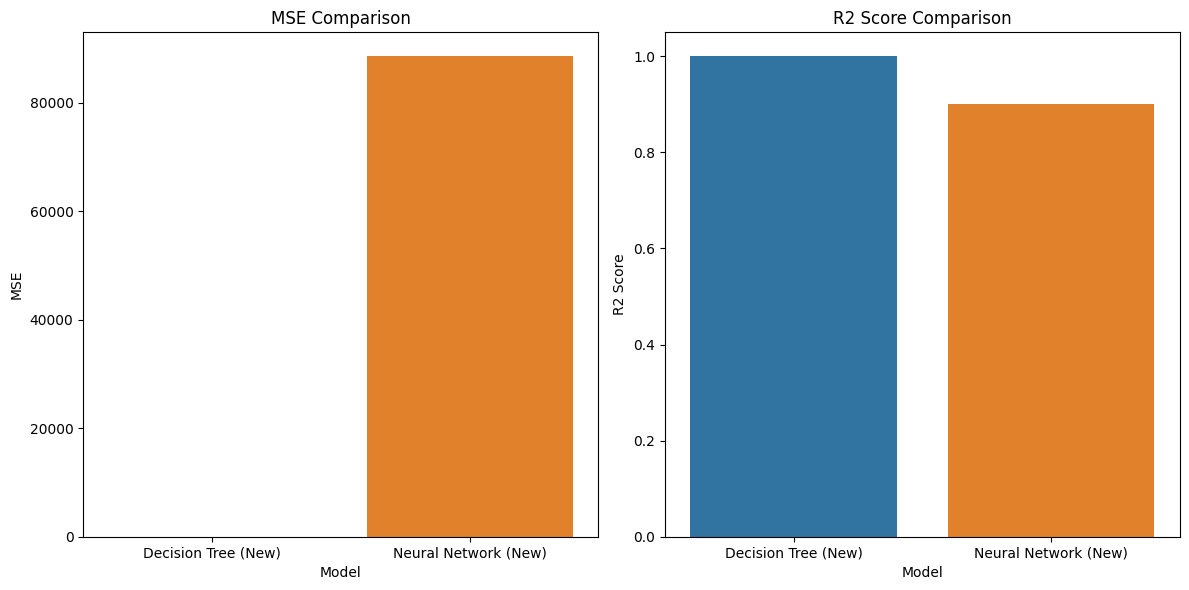

In [ ]:
new_evaluation_results = pd.DataFrame({
    'Model': ['Decision Tree (New)', 'Neural Network (New)'],
    'MSE': [dt_mse_new, nn_mse_new],
    'R2 Score': [dt_r2_new, nn_r2_new]
})

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=new_evaluation_results)
plt.title('MSE Comparison')
plt.ylabel('MSE')
plt.xlabel('Model')

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2 Score', data=new_evaluation_results)
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.xlabel('Model')

plt.tight_layout()
plt.show()